In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy.stats as stats
import altair as alt
from sklearn.linear_model import LinearRegression


Populating the interactive namespace from numpy and matplotlib


In [2]:

dfsc=pd.read_excel('sc.xlsx',sheet_name='sc')
df=pd.read_excel('sc.xlsx',sheet_name='mauOD')

In [3]:
#first calculate standard curve

In [4]:
x = dfsc[["mau320"]]
y = dfsc[["mg/L"]]
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
regr = LinearRegression()
regr.fit(x, y)
coef=float(regr.coef_[0])
inter=float(regr.intercept_)

print('Standard curve\nx = mau@320nm, y = mg/L standard','\nm=' ,coef,'\nb=',inter, '\nR2=',stats.pearsonr(dfsc['mg/L'],dfsc['mau320'])[0] ** 2)

Standard curve
x = mau@320nm, y = mg/L standard 
m= 0.1227973254309782 
b= -3.7532082269906653 
R2= 0.9995043572248375


/Library/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error in 3.6
  if __name__ == '__main__':


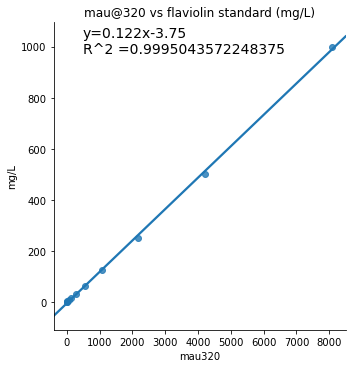

In [5]:
#plotting the standard curve
g = sns.lmplot(x="mau320", y="mg/L", data=dfsc,
               truncate=False,ci=None
                   )
props = dict(boxstyle='round', alpha=0,color=sns.color_palette()[0])
textstr = 'y='+str(coef)[:5]+'x'+str(inter)[:5]+'\nR^2 ='+str(stats.pearsonr(dfsc['mau320'],dfsc['mg/L'])[0] ** 2)
g.ax.text(0.1, 0.9, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)
plt.title('mau@320 vs flaviolin standard (mg/L)')
plt.savefig('HPLCstandardCurve.pdf',kind='pdf')

In [6]:
#convert mau from HPLC measurements to titer (mg/L)

In [7]:
def curve(x):
    if x>0:
        return x*coef+inter
    else:
        return 0
df['titer']=df['mau320'].apply(curve)

In [8]:
x=df.OD340
y=df['titer']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
regr = LinearRegression()
X = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
regr.fit(X, y)
coef2=float(regr.coef_[0])
inter2=float(regr.intercept_)

print('correlation between OD340 and mau320 (sample vs sample)\n''m=' ,coef2,'\nb=',inter2, '\nR2=',stats.pearsonr(df['OD340'],df['titer'])[0] ** 2)

correlation between OD340 and mau320 (sample vs sample)
m= 112.38737516669566 
b= -13.642318302694438 
R2= 0.7573787545130652


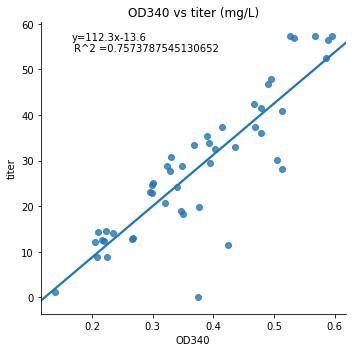

In [9]:
g = sns.lmplot(x="OD340", y="titer",palette='Reds',#colour='Ass',
               data=df,
               truncate=False,ci=None,
                  #xlim=(0, 60), ylim=(0, 12),
                  aspect=3/3)
props = dict(boxstyle='round', alpha=0,color=sns.color_palette()[0])
textstr = 'y='+str(coef2)[:5]+'x'+ ''+ str(inter2)[:5]+ '\n R^2 ='+str(stats.pearsonr(df['OD340'],df['titer'])[0] ** 2)
g.ax.text(0.1, .9, textstr, transform=g.ax.transAxes, fontsize=10, bbox=props)
plt.title('OD340 vs titer (mg/L)')
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.savefig('OD340vTiter_OD340vHPLC.pdf')
